<div align='center'>

# Lab04 - SVM

<div/>

This lab aims to build **SVM** models to predict the survival using the Titanic dataset.

## 1. Load Neccessary Packages

Notebook Colors:


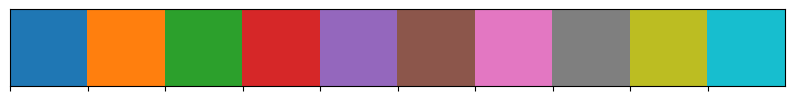

In [1]:
# Import the neccessary packages

import os 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

class clr:
    # Reset
    E = "\033[0m"
    # Colors
    R = "\033[91m"   # Red
    G = "\033[92m"   # Green
    Y = "\033[93m"   # Yellow
    B = "\033[94m"   # Blue
    M = "\033[95m"   # Magenta
    C = "\033[96m"   # Cyan
    W = "\033[97m"   # White

my_colors = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # yellow-green
    "#17becf"   # cyan
]

print(clr.G+'Notebook Colors:'+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [2]:
import os
import pandas as pd

'''Function to load the dataset'''
def load_dataset(data_file):
    current_path = os.getcwd() # get the current working directory 
    data_path = os.path.join(current_path, 'data', data_file) # join the path to get the absolute file_path
    df = pd.read_csv(data_path) # load the data using pandas
    return df

## 2. Load Dataset

In [3]:
# Use the load_dataset(file_path) from utils to load the dataset

try:
    df = load_dataset('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
    print(clr.G+'Dataset loaded successfully ✅!! Congratulations ✨'+clr.E, '\n\n')
except Exception as e:
    print(clr.R+f'Failed to load dataset ❌!!\nReason: {e}'+clr.E, '\n\n')

Dataset loaded successfully ✅!! Congratulations ✨ 




## 3. Explanatory Data Analysis

### 3.1 - View Data Important Information

In [4]:
# View the shape of the datset

print(f'Dataset shape (number of examples, number of features): {df.shape}', '\n\n')

Dataset shape (number of examples, number of features): (891, 12) 




In [5]:
# View dataset information

print(clr.G+f'Dataset information: \n\n'+clr.E, df.info, '\n\n')

Dataset information: 

 <bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..           

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [6]:
# View dataset description

print(clr.G+'Dataset Description:'+clr.E)
print(df.describe(), '\n\n')


Dataset Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   




In [7]:
## View some examples of the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3.2 - Get the percentage of the value types 

We want to plot the percentage of value types so that we understand, how many types of data there are. Therefore, we can perform data transformation before fitting into the models.

<Axes: ylabel='count'>

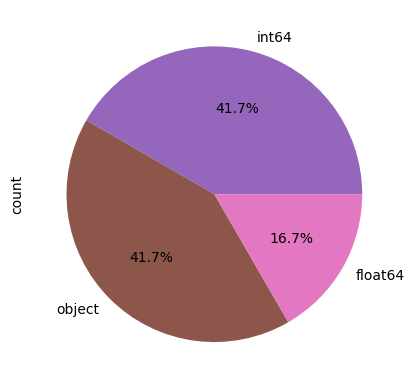

In [8]:
# Plot pie chart to observe the percentage of value types
df.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

=> There are 41.7% of values of type object, => Then we want to look at those features and think of the possible transformations for them.

### 3.3 - Solving missing data and data transformation in the dataset

In [9]:
# This function is used to check the missing values of the dataset

def check_missing(df):
    print(clr.G+'=== Missing Values Information ==='+clr.E)
    print(clr.G+"Total Missing Values: "+clr.E, df.isnull().sum().sum())
    print(clr.G+"Missing values for each features: \n"+clr.E, df.isnull().sum(), '\n\n')

In [10]:
# Check the missing values in the dataset
check_missing(df)

=== Missing Values Information ===
Total Missing Values:  866
Missing values for each features: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 




In [11]:
# Convert 'sex' to numerical
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [12]:
# Handle missing values for Age using median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
# Handle missing values for Embarked
df['Embarked'] = df['Embarked'].fillna('S') # Filling missing values in Embarked with S

In [14]:
# Convert df['Embarked'] to numerical using get_dummies()
df = pd.get_dummies(df, columns=['Embarked'])

# Convert True/False values to 0/1
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

#### Extract "Name" columnn into "Title"

In [15]:
# extract Title from Name
df["Title"] = df["Name"].str.extract(r",\s*([^\.]+)\.")  # everything between ',' and '.'

# Count frequencies of each title
title_counts = df["Title"].value_counts()
print(title_counts)

# Get the list of rare titles (which appears under 10 times)
rare_titles = title_counts[title_counts < 10].index

# Replace rare titles with 'Other'
df["Title"] = df["Title"].replace(rare_titles, "Other")
print(df["Title"].nunique())

# One-hot encode the title
df = pd.get_dummies(df, columns=["Title"], prefix="Title")

# Convert True/False values to 0/1
df['Title_Mrs'] = df['Title_Mrs'].astype(int)
df['Title_Mr'] = df['Title_Mr'].astype(int)
df['Title_Master'] = df['Title_Master'].astype(int)
df['Title_Other'] = df['Title_Other'].astype(int)
df['Title_Miss'] = df['Title_Miss'].astype(int)

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64
5


<Axes: ylabel='count'>

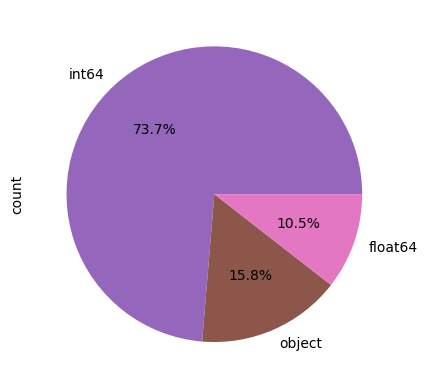

In [16]:
# Plot pie chart to observe the percentage of value types after being processed
df.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

=> After being processed, there is only 15.8% of data right now is of type object (those columns include **Cabin, Name, Ticket**).

1. For **Cabin**, there are too many missing values, so it is quite hard to fill in those missing values. Therefore, I won't include this column in training.
2. For **Name**, because I have extracted **Name** into **Title** columns, I will drop **Name** when training.
3. Finally for **Ticket**, there are many unique values of tickets (681), so it does not represent any patterns, which is not a valuable feature for training. Therefore, I will drop it when training.

### 3.4 - Checking the balance of labels in the dataset

We want to make sure that in the dataset, there is no high imbalance between the labels, in this dataset, the number of labels 0 and 1 must be balanced.

Text(0, 0.5, 'Counts')

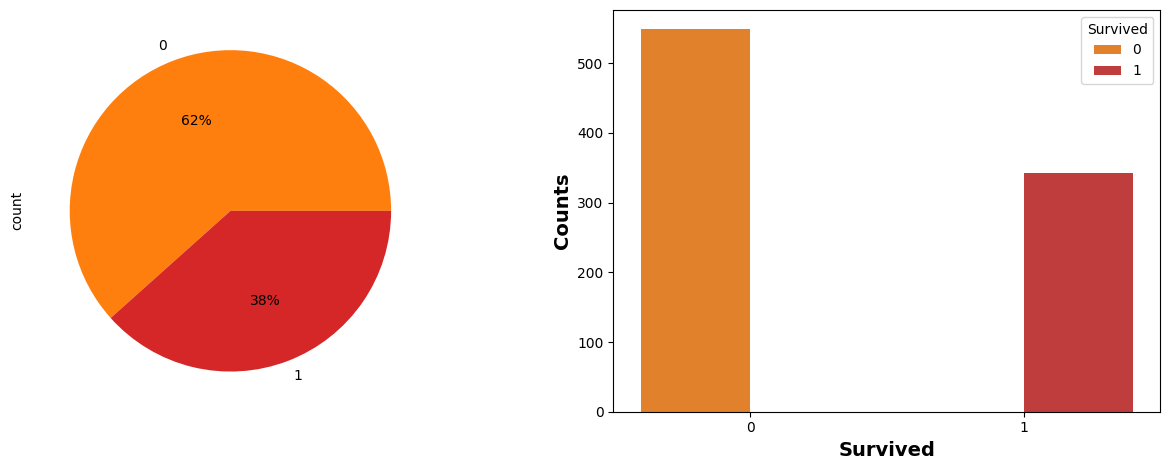

In [17]:
# We will first plot the number of survived and not_survived labels in bar and pie charts

plt.figure(figsize=(24, 24))
plt.subplot(4, 3, 1)
df['Survived'].value_counts().plot(kind='pie', autopct='%0.f%%', colors=[my_colors[1],my_colors[3]])
plt.subplot(4, 3, 2)
sns.countplot(data=df, x='Survived', hue='Survived', palette=[my_colors[1], my_colors[3]])
plt.xlabel('Survived', size=14, weight='bold')
plt.ylabel('Counts', size=14, weight='bold')

=> From the plots, we see that the labels **0** and **1** is not too imbalanced, so we will first keep it and do not perform any solution to this.

### 3.5 - Checking the correlation and collinearity

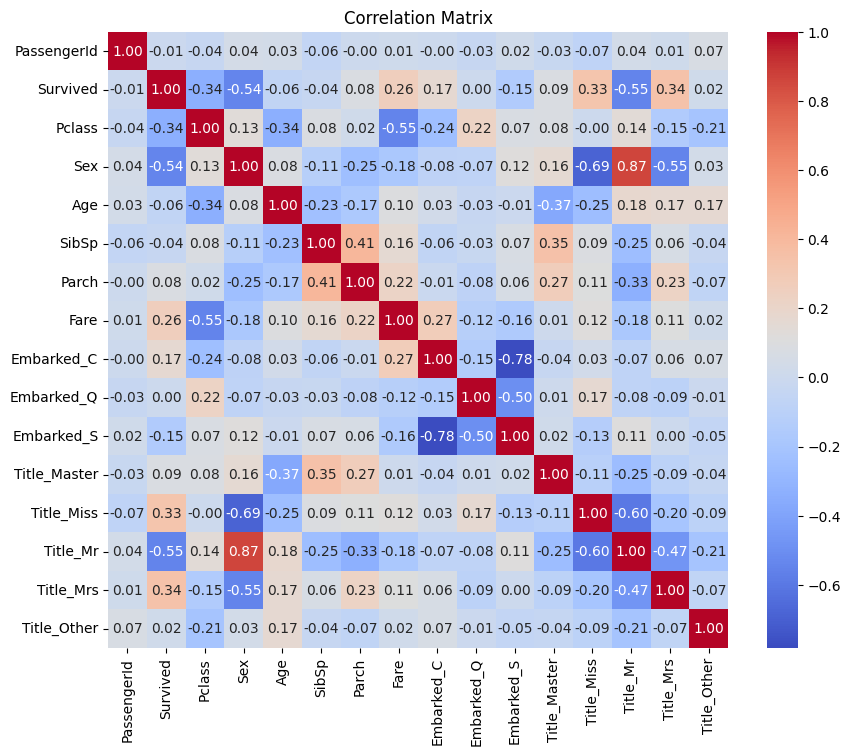

In [18]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# PLot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

=> From the correlation matrix, we see that the **SibSp** and **Parch** are quite correlated and they are all related to members in a family, so we will handle them by summing them and create a new feature. Moreover, the correlation betwen **Title_Mr** and **Sex** is high, so I will drop the column **Title_Mr**.

In [19]:
# Handle the correlation

df['FamilySize'] = df['SibSp'] + df['Parch']

## 4. Split Training and Testing Sets

### 4.1 - Split X and y

In [20]:
print(clr.G+"Number of unique values for Ticket -"+clr.E, df['Ticket'].nunique())

Number of unique values for Ticket - 681


In [21]:
# Drop the unncessary features

df_new = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Title_Mr'], axis=1)

<Axes: ylabel='count'>

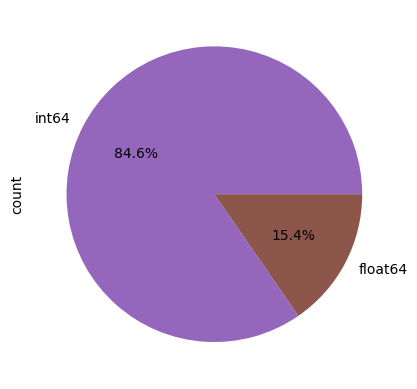

In [22]:
# Plot pie chart to make sure there is no object-type values

df_new.dtypes.value_counts().plot(kind='pie', autopct='%0.1f%%', colors=[my_colors[4],my_colors[5],my_colors[6]])

In [23]:
# Define X and y

X = df_new.drop(['Survived'], axis=1)
y = df_new['Survived']

In [24]:
# Print columns in X
print(clr.G+"Columns in X:"+clr.E)
print(X.columns.tolist())

# Print column in y
print(clr.G+"\nColumn in y:"+clr.E)
print(y.name)

Columns in X:
['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mrs', 'Title_Other', 'FamilySize']

Column in y:
Survived


### 4.2 - Split training set and test set


In [25]:
# Split the training and test set using train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 42,
    stratify=y
)

In [26]:
feature_names = X_train.columns.tolist()
print(feature_names)

['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mrs', 'Title_Other', 'FamilySize']


### 4.3 - Normalization

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Training with different Kernels

For SVM models, I will first train some simple model with different kernels (including 'rbf', 'linear', 'sigmoid', 'poly'), and with three values of hyperparameter 'C' (1.0, 100.0, 1000.0)

### 5.1 - Training using 'rbf' kernel and tune with different 'C'

#### a. Default 'rbf' kernel and C=1.0

In [28]:
# instantiate classifier with rbf kernel and C=1.0
from sklearn.svm import SVC

# Create an instance of SVC
svc = SVC()

# fit with the training data
svc.fit(X_train_scaled, y_train)

# make predictions 
y_pred = svc.predict(X_test_scaled)

# print the results
print(clr.G+'rbf SVM model with C=1.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

rbf SVM model with C=1.0:
Accuracy: 0.8379888268156425
Report:               precision    recall  f1-score   support

           0       0.93      0.83      0.88       123
           1       0.70      0.86      0.77        56

    accuracy                           0.84       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.84      0.84       179



#### b. SVM model with C = 100.0

In [29]:
# instantiate classifier with rbf kernel and C=100.0
svc = SVC(C=100.0)

# fit with the training data
svc.fit(X_train_scaled, y_train)

# make predictions 
y_pred = svc.predict(X_test_scaled)

# print the results
print(clr.G+'rbf SVM model with C=100.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

rbf SVM model with C=100.0:
Accuracy: 0.770949720670391
Report:               precision    recall  f1-score   support

           0       0.86      0.79      0.82       121
           1       0.62      0.74      0.68        58

    accuracy                           0.77       179
   macro avg       0.74      0.76      0.75       179
weighted avg       0.79      0.77      0.78       179



#### c. SVM model with C = 1000.0

In [30]:
# instantiate classifier with rbf kernel and C=1000.0
svc = SVC(C=1000.0)

# fit with the training data
svc.fit(X_train_scaled, y_train)

# make predictions 
y_pred = svc.predict(X_test_scaled)

# print the results
print(clr.G+'rbf SVM model with C=1000.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

rbf SVM model with C=1000.0:
Accuracy: 0.7262569832402235
Report:               precision    recall  f1-score   support

           0       0.80      0.77      0.78       115
           1       0.61      0.66      0.63        64

    accuracy                           0.73       179
   macro avg       0.70      0.71      0.71       179
weighted avg       0.73      0.73      0.73       179



### 5.2 - Training using 'linear' kernel with different 'C'

#### a. C = 1.0

In [31]:
# instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear', C=1.0)

# fit with the training data
linear_svc.fit(X_train_scaled, y_train)

# make predictions 
y_pred = linear_svc.predict(X_test_scaled)

# print the results
print(clr.G+'Linear SVM model with C=1.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

Linear SVM model with C=1.0:
Accuracy: 0.8435754189944135
Report:               precision    recall  f1-score   support

           0       0.90      0.85      0.88       116
           1       0.75      0.83      0.79        63

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.84      0.85       179



#### b. C = 100

In [32]:
# instantiate classifier with linear kernel and C=100.0
linear_svc = SVC(kernel='linear', C=100.0)

# fit with the training data
linear_svc.fit(X_train_scaled, y_train)

# make predictions 
y_pred = linear_svc.predict(X_test_scaled)

# print the results
print(clr.G+'Linear SVM model with C=100.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

Linear SVM model with C=100.0:
Accuracy: 0.8435754189944135
Report:               precision    recall  f1-score   support

           0       0.90      0.85      0.88       116
           1       0.75      0.83      0.79        63

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.84      0.85       179



#### c. C = 1000

In [33]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc = SVC(kernel='linear', C=1000.0)

# fit with the training data
linear_svc.fit(X_train_scaled, y_train)

# make predictions 
y_pred = linear_svc.predict(X_test_scaled)

# print the results
print(clr.G+'Linear SVM model with C=1000.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

Linear SVM model with C=1000.0:
Accuracy: 0.8435754189944135
Report:               precision    recall  f1-score   support

           0       0.90      0.85      0.88       116
           1       0.75      0.83      0.79        63

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.85      0.84      0.85       179



### 5.3 - Training with 'poly' kernel and different 'C'

#### a. C = 1.0

In [34]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_scaled)


# print the results
print(clr.G+'poly SVM model with C=1.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

poly SVM model with C=1.0:
Accuracy: 0.8379888268156425
Report:               precision    recall  f1-score   support

           0       0.92      0.83      0.87       121
           1       0.71      0.84      0.77        58

    accuracy                           0.84       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.84      0.84       179



#### b. C = 100.0

In [35]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_scaled)


# print the results
print(clr.G+'poly SVM model with C=100.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

poly SVM model with C=100.0:
Accuracy: 0.7541899441340782
Report:               precision    recall  f1-score   support

           0       0.86      0.77      0.81       124
           1       0.58      0.73      0.65        55

    accuracy                           0.75       179
   macro avg       0.72      0.75      0.73       179
weighted avg       0.78      0.75      0.76       179



#### c. C = 1000.0

In [36]:
# instantiate classifier with polynomial kernel and C=1000.0
poly_svc=SVC(kernel='poly', C=1000.0) 


# fit classifier to training set
poly_svc.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test_scaled)


# print the results
print(clr.G+'poly SVM model with C=1000.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

poly SVM model with C=1000.0:
Accuracy: 0.7206703910614525
Report:               precision    recall  f1-score   support

           0       0.82      0.75      0.78       120
           1       0.57      0.66      0.61        59

    accuracy                           0.72       179
   macro avg       0.69      0.71      0.70       179
weighted avg       0.73      0.72      0.73       179



### 5.4 - Training with 'sigmoid' kernel and different 'C'

#### a. C = 1.0

In [37]:
# instantiate classifier with polynomial sigmoid and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test_scaled)


# print the results
print(clr.G+'sigmoid SVM model with C=1.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

sigmoid SVM model with C=1.0:
Accuracy: 0.7150837988826816
Report:               precision    recall  f1-score   support

           0       0.78      0.76      0.77       113
           1       0.61      0.64      0.62        66

    accuracy                           0.72       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.72      0.72      0.72       179



#### b. C = 100.0

In [38]:
# instantiate classifier with polynomial sigmoid and C=100.0
sigmoid_svc=SVC(kernel='sigmoid', C=100.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test_scaled)


# print the results
print(clr.G+'sigmoid SVM model with C=100.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

sigmoid SVM model with C=100.0:
Accuracy: 0.7430167597765364
Report:               precision    recall  f1-score   support

           0       0.76      0.81      0.79       104
           1       0.71      0.65      0.68        75

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



#### c. C = 1000.0

In [39]:
# instantiate classifier with polynomial sigmoid and C=1000.0
sigmoid_svc=SVC(kernel='sigmoid', C=1000.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test_scaled)


# print the results
print(clr.G+'sigmoid SVM model with C=1000.0:'+clr.E)
print('Accuracy:', accuracy_score(y_pred, y_test))
print('Report:', classification_report(y_pred, y_test))

sigmoid SVM model with C=1000.0:
Accuracy: 0.7430167597765364
Report:               precision    recall  f1-score   support

           0       0.76      0.81      0.79       104
           1       0.71      0.65      0.68        75

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



## 6. Testing with KFold and 'linear' kernel

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# instantiate KFold with n_splits=5
kfold=KFold(n_splits=5, shuffle=True, random_state=0)

# instantiate a SVC model with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)

# Calculate the cross-validation scores
linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)

In [41]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

Stratified cross-validation scores with linear kernel:

[0.83240223 0.81460674 0.8258427  0.84269663 0.84269663]


In [42]:
# print average cross-validation score with linear kernel

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Average stratified cross-validation score with linear kernel:0.8316


## 7. GridSearch with different parameters

Deeply tuning hyperparameters using grid search and get the best model.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# instantiate classifier with default hyperparameters
svc = SVC()

# declare parameters for hyperparameter tuning
parameters = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
    {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05]}
]

# GridSearchCV with parallel processing
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters and score
print(clr.G+"Best parameters found: "+clr.E, grid_search.best_params_)
print(clr.G+"Best cross-validation score: "+clr.E, grid_search.best_score_)


Fitting 5 folds for each of 124 candidates, totalling 620 fits
Best parameters found:  {'C': 1, 'kernel': 'linear'}
Best cross-validation score:  0.8300994779868018


In [44]:
# examine the best model


# best score achieved during the GridSearchCV
print(clr.G+'GridSearch CV best score : \n\n'+clr.E, grid_search.best_score_)


# print parameters that give the best results
print(clr.G+'\n\nParameters that give the best results :'+clr.E,'\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print(clr.G+'\n\nEstimator that was chosen by the search :'+clr.E,'\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 

 0.8300994779868018


Parameters that give the best results : 

 {'C': 1, 'kernel': 'linear'}


Estimator that was chosen by the search : 

 SVC(C=1, kernel='linear')


In [45]:
# calculate GridSearch CV score on test set

print(clr.G+'GridSearch CV score on test set: '+clr.E, grid_search.score(X_test_scaled, y_test))

print(classification_report(y_test, y_pred))

GridSearch CV score on test set:  0.8435754189944135
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       110
           1       0.65      0.71      0.68        69

    accuracy                           0.74       179
   macro avg       0.73      0.74      0.73       179
weighted avg       0.75      0.74      0.74       179



## 8. GridSearch with different parameters and test sizes

Using gridsearch but with different test_sizes

In [46]:
# Define the grid
parameters = [
    {'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
    {'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5], 'gamma': [0.01, 0.02, 0.03, 0.04, 0.05]}
]

# Loop over different test sizes
for test_size in [0.1, 0.2, 0.3, 0.4]:
    print(f"\n{'='*40}")
    print(f"Test size: {test_size}")
    print(f"{'='*40}")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize classifier
    svc = SVC()

    # GridSearchCV setup
    grid_search = GridSearchCV(estimator=svc,
                               param_grid=parameters,
                               scoring='accuracy',
                               cv=5,
                               verbose=0,
                               n_jobs=-1)

    # Fit grid search
    grid_search.fit(X_train_scaled, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Evaluate on test set
    test_score = best_model.score(X_test_scaled, y_test)
    y_pred = best_model.predict(X_test_scaled)

    # Print results
    print("Best Parameters:", grid_search.best_params_)
    print("Best CV Accuracy:", round(grid_search.best_score_, 4))
    print("Test Set Accuracy:", round(test_score, 4))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Test size: 0.1
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.8377
Test Set Accuracy: 0.8111
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        55
           1       0.82      0.66      0.73        35

    accuracy                           0.81        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.81      0.81        90


Test size: 0.2
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best CV Accuracy: 0.8301
Test Set Accuracy: 0.8436
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       110
           1       0.83      0.75      0.79        69

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Test size: 0.3
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel